**this is a template notebook for Assignment 2 on Clustering. To get a 60 you will need to complete chapter 1 and 2.
    The template is also just an indication. You can add more cells if needed, and can of course delete this line**

# <span style ='background:yellow'>\<Title of your notebook>


Author: <span style='background:yellow'>\<your name\></span><br>
Student number: <span style='background:yellow'>\<your student number\></span><br>
Date: <span style='background:yellow'>\<current date\></span>

For this notebook to work you must have installed the following packages (usually via pip install *packageName*:
* numpy
* pandas
* **\<add other packages\>**

From these we will need the following libraries:

In [198]:
# enter here all those 'from .... import ....'
# numpy as np
try:
    import numpy as np
    print('NumPy already installed, only imported')
except:
    !pip install numpy
    import numpy as np
    print('NumPy was not installed, installed and imported')
      
# pyplot as plt
try:
    import matplotlib.pyplot as plt
    print('PyPlot already installed, only imported')
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt
    print('PyPlot was not installed, installed and imported')

# pandas as pd   
try:
    import pandas as pd
    print('pandas already installed, only imported')
except:
    !pip install pandas
    import pandas as pd
    print('pandas was not installed, installed and imported')
    
try:
    import seaborn as sn
    print('seaborn already installed, only imported')
except:
    !pip install seaborn
    import seaborn as sn
    print('seaborn was not installed, installed and imported')

try:
    from sklearn.model_selection import train_test_split
    print('sklearn already installed, only imported')
except:
    !pip install sklearn
    from sklearn.model_selection import train_test_split
    print('sklearn was not installed, installed and imported')
    

NumPy already installed, only imported
PyPlot already installed, only imported
pandas already installed, only imported
seaborn already installed, only imported
sklearn already installed, only imported


# 1. The Data
We are going to use the datafile **<span style ='background:yellow'>\<your datafile\></span>**. This contains data from **<span style ='background:yellow'>\<add your description\></span>**.

In [199]:
# enter the code to load the data
data=pd.read_csv('Star3642_balanced.csv', sep = ',')

Here's a quick look at the data:

In [200]:
# enter the code to see the first few rows of the data
data.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1


**<span style ='background:yellow'>\<explain the variables (/fields/columns) you are going to use for your prediction. The dependent y (the one you are going to predict) and two independent x's (the ones you are going to use to predict that y). What do these variables mean?\></span>**

*note:* Its easiest if your independent x variables are numeric.

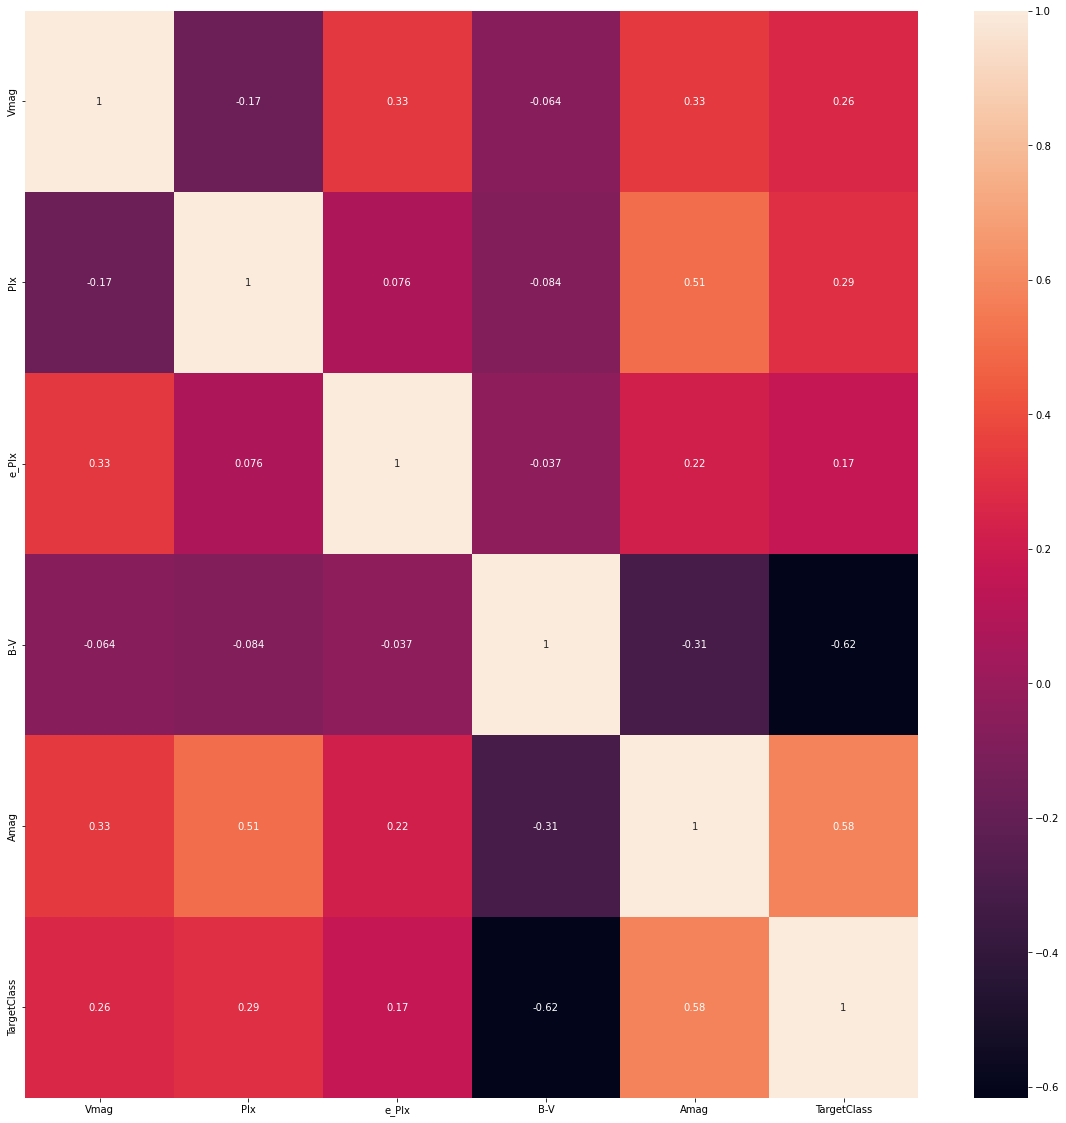

In [201]:
plt.figure(figsize=(20,20))
data.corr()
corrdata = data.corr()
sn.heatmap(corrdata, annot = True)
plt.show()

The categorical dependent variable <span style ='background:yellow'>\<your y variable name></span> has the following categories:

In [202]:
# code that returns the different categories in the y variable.
data["TargetClass"] = pd.Categorical(data["TargetClass"])
data["TargetClass"].cat.categories

Int64Index([0, 1], dtype='int64')

We'll also need some training and testing data, so:

In [203]:
# code to split data in training and testing

x = np.array(data["Amag"])
y = np.array(data["TargetClass"])
xRes = x.reshape((-1,1))
yRes = y.reshape((-1,1))

xRes_train, xRes_test, yRes_train, yRes_test = train_test_split(xRes, yRes, test_size=0.4, random_state=101)


All set, lets try to predict this using our independent variable **<span style ='background:yellow'>\<your x variable name></span>**

# 2. The Basic Classification Models

In the Jupyter Notebook from lecture 5 a few different Clustering techniques were discussed. Lets explore how these perform on the data.

Before we look at some 'real' models, its a good idea to get a baseline in by using one or more of the dummy classifiers. Lets see how they perform:

In [204]:
# code to create, fit and measure the dummy classifiers (see chapter 5.4. in the lecture notebook)
# include both the accuracy score and the confusion matrix for each.
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier

In [205]:
#Dummy Classifier - Most Frequent
dumMF = DummyClassifier(strategy='most_frequent')
dumMF = dumMF.fit(xRes_train, yRes_train)
y_pred = dumMF.predict(xRes_test)
print(metrics.accuracy_score(yRes_test, y_pred))
print(confusion_matrix(yRes_test, y_pred))

0.49279341111873715
[[718   0]
 [739   0]]


In [206]:
#Dummy Classifier - Prior
dumPrior = DummyClassifier(strategy="prior")
dumPrior.fit(xRes_train, yRes_train)
y_pred = dumPrior.predict(xRes_test)
print(metrics.accuracy_score(yRes_test, y_pred))
print(confusion_matrix(yRes_test, y_pred))


0.49279341111873715
[[718   0]
 [739   0]]


In [207]:
#Dummy Classifier - Stratified method
dumSrat = DummyClassifier(strategy="stratified")
dumSrat = dumSrat.fit(xRes_train, yRes_train)
y_pred = dumSrat.predict(xRes_test)
print(metrics.accuracy_score(yRes_test, y_pred))
print(confusion_matrix(yRes_test, y_pred))

0.5202470830473576
[[394 324]
 [375 364]]


In [208]:
dumUni = DummyClassifier(strategy="uniform")
dumUni.fit(xRes_train, yRes_train)
y_pred = dumUni.predict(xRes_test)
print(metrics.accuracy_score(yRes_test, y_pred))
print(confusion_matrix(yRes_test, y_pred))

0.5030885380919699
[[346 372]
 [352 387]]


**<span style ='background:yellow'>\<explain all the results. What do the numbers mean?></span>**

So, those are our 'baseline'. A model should be able to at least outperform these.

Lets dive in...

## 2.1. Naive Bayes

The first model discussed was the Naive Bayes model. 

**<span style ='background:yellow'>\<explain briefly in your own words how a Naive Bayes method works></span>**

Lets create and fit this model:

In [209]:
# code to create the model, and fit the data.

# Import the GaussianNB so we can use the commonly used Gaussian transformation
from sklearn.naive_bayes import GaussianNB

#set the model to GaussianNB
gaussNB = GaussianNB()

mdat = data[["Amag","Vmag","TargetClass"]]


x = mdat[["Amag","Vmag"]]
y = mdat["TargetClass"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)


gaussNB.fit(x_train, y_train)
y_pred = gaussNB.predict(x_test)

Now to measure its performance:

In [210]:
# code to show its accuracy score AND confusion matrix.
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8023335621139327
[[575 143]
 [145 594]]


**<span style ='background:yellow'>\<explain all the results. What do the numbers mean? How is this compared to the dummy classifiers?></span>**

Lets also have a look at what a prediction would be. If the **<span style ='background:yellow'>\<your first x variable><span>** has a score of **<span style ='background:yellow'>\<enter some value></span>** and the **<span style ='background:yellow'>\<your other x variable></span>** has a score of **<span style ='background:yellow'>\<enter some value></span>**, then this model will predict:

In [211]:
# code to show the prediction
(575+594)/(575+143+145+594)

gaussNB.predict_proba(x)


array([[0.6460116 , 0.3539884 ],
       [0.62559895, 0.37440105],
       [0.90322703, 0.09677297],
       ...,
       [0.95784897, 0.04215103],
       [0.54428679, 0.45571321],
       [0.67115371, 0.32884629]])

That's about it for NB. A nice thing about NB is that it doesn't really require any parameters. Lets look at our next technique.

## 2.2. Support Vector Machines
The second model discussed were Support Vector Machines. There is a plural here, because we can use different kernels.

**<span style ='background:yellow'>\<explain briefly in your own words how a SVM method works></span>**

The basic kernel is the linear one, so we'll attempt that first:

In [212]:
# code to create the model, and fit the data.
# Import the required SVC package from sklearn
from sklearn.svm import SVC

# Create the model, then fit the model, and determine the predicted values
svmLin = SVC(kernel='linear')
svmLin.fit(x, y)
y_pred = svmLin.predict(x)

Measuring its performance....

In [213]:
# code to show its accuracy score AND confusion matrix.
print(metrics.accuracy_score(y, y_pred))
print(confusion_matrix(y, y_pred))

0.8171334431630972
[[1568  253]
 [ 413 1408]]


**<span style ='background:yellow'>\<explain all the results. What do the numbers mean? How is this compared to the dummy classifiers, and the NB?></span>**

Lets do the same for the other kernels that were discussed, i.e. rbf, polynomial, and sigmoid.

In [214]:
# code to create the models, fit the data, and show its accuracy score AND confusion matrix.
# make sure to print some text between to indicate which result belongs to which model.


**<span style ='background:yellow'>\<explain all the results. What do the numbers mean? How is this compared to the dummy classifiers?></span>**

Allright, lets move on to the third technique...

## 2.3. K-Nearest Neighbors
The third technique is the K-Nearest Neighbors (KNN). 

**<span style ='background:yellow'>\<explain briefly in your own words how a KNN method works></span>**

To use this we need to do some additional steps.

First we need to normalize our x variables:

In [215]:
# use the StandardScaler to normalize the two x variables


Second we need to determine how many neighbors (k) we want. To do this we'll visualize the results using different values for k.

In [216]:
# Code to create the graph with Error Rate vs. K-values.


**<span style ='background:yellow'>\<explain the result and your choice for k based on the graph></span>**

*Note:* +0.5 if you also use the GridSearch technique to decide on k.

Now that we know what we want k to be, we can create the model.

In [217]:
# code to create the model with the selected k


Lets find out how good it is:

In [218]:
# code to show its accuracy score AND confusion matrix.


**<span style ='background:yellow'>\<explain all the results. What do the numbers mean? How is this compared to the dummy classifiers, the NB, and the SVM kernels?></span>**

One more basic technique to go.

## 2.4. Decision Trees
The last technique that was discussed in detail, were the Decision Trees. 

**<span style ='background:yellow'>\<explain briefly in your own words how a Decision Tree method works></span>**

The following variations were discussed:

* ID3 (or entropy with sklearn)
* Gini
* Random Forest
* Extra trees

Hopefully we have the hang of this now, so lets do each of them in one go:

In [219]:
# code to create the models, fit the data, and show its accuracy score AND confusion matrix.
# make sure to print some text between to indicate which result belongs to which model.


**<span style ='background:yellow'>\<explain all the results. What do the numbers mean? How is this compared to the dummy classifiers, the NB, the SVM kernels, and the knn?></span>**

One last set of techniques to explore.

## 2.5. Other Models
In the Jupyter Notebook from the lecture, in chapter 5.4 a few more techniques were simply shown:

* Linear Discriminant Analysis
* Quadratic Discriminant Analysis
* Logistic Regression Classifier
* Multinomial Logistic Regression Classification
* Adaptive Boosting
* Gradient Boosting
* Histogram Gradient Boosting
* XGBoost
* Stacking

Out of curiousity lets see how these perform.

In [220]:
# code to create the models, fit the data, and show its accuracy score (the confusion matrix is here optional).
# make sure to print some text between to indicate which result belongs to which model.


**<span style ='background:yellow'>\<which performed best?></span>**

<font size="5"><center>-----Chapters 1 and 2 are required to be fully completed to get a 60, the next few chapters will give a +10 for each chapter.<br> 
    However the template is not as extensive as the previous chapters. <br>
    You can select any chapter below the order is not fixed (you can leave the others empty)<br>
    You don't have to use the same dataset for the chapters below. If it helps in clarification you can use another dataset, but then make sure to include it as you submit.
    ----</center></font>

# 3. Visualisation

With two input parameters we can actually determine visually where a model will classify a variable into which category. An overview of such plots is shown at https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

We cannot copy that code since it does a comparison. What we want is a function that takes the X and Y data as input, as well as the model to be used and then shows the decision areas.

In [221]:
# the code for the function


In [222]:
# an example of using the function


# 4. Categorical Input
With classification we have a categorical output variable, but what if we also have one or more categorical input variables.

One popular technique is one-hot-encoding, but there are others.

In this chapter we'll discuss **<span style ='background:yellow'>\<your chosen technique></span>**.

**<span style ='background:yellow'>\<explain the technique in detail. What does it do and how does it work></span>**

In [223]:
# example code of using this technique


# 5. Performance
Some models get higher accuracy scores than others. In the Jupyter Notebook from the lecture the UFC data was used and the QDA had the highest accuracy score: 0.6747. The big question is, can it be done better? First areas to look for improvement are to simply increase the number of input variables, or tweak some parameters of some of the models, or a combination of both.

In this chapter we'll give it an attempt.

First we need to load the data:

In [224]:
# code to load the UFC data


**<span style ='background:yellow'>\<explain your attempt, what did you do.></span>**

In [225]:
# code that will generate an accuracy score for the outcome that is higher than 0.6747


# 6. A New Technique

Many techniques were discussed in class and the lecture Jupyter Notebook, but there are a lot more. In this chapter the \<your chosen new technique> is discussed.

**<span style ='background:yellow'>\<explain in detail this new technique. Note that other students should be able to understand it from your explanation alone!></span>**

In [226]:
# code on using this technique


**<span style ='background:yellow'>\<feel free to use more cells for this, you probably need them></span>**